In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

In [2]:
df= pd.read_csv('houses_Madrid.csv',index_col=0 )

In [3]:
df

,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,5,Ático en venta en Casco Histórico de Barajas,"Barajas, Madrid",78.0,NaN,2,2.0,NaN,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN
21738,4,Piso en venta en Urb. Campo de las Naciones - ...,"Barajas, Madrid",96.0,83.0,2,2.0,NaN,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,False,True,True,True
21739,3,Piso en venta en Campo de las Naciones-Corralejos,"Barajas, Madrid",175.0,NaN,4,2.0,NaN,NaN,NaN,...,E,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN
21740,2,"Chalet adosado en venta en calle Burriana, 12","Campo de las Naciones-Corralejos, Madrid",289.0,NaN,4,3.0,3.0,304.0,NaN,...,en trámite,True,NaN,NaN,True,0.0,False,False,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21742 entries, 0 to 21741
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21742 non-null  int64  
 1   title                         21742 non-null  object 
 2   subtitle                      21742 non-null  object 
 3   sq_mt_built                   21616 non-null  float64
 4   sq_mt_useful                  8228 non-null   float64
 5   n_rooms                       21742 non-null  int64  
 6   n_bathrooms                   21726 non-null  float64
 7   n_floors                      1437 non-null   float64
 8   sq_mt_allotment               1432 non-null   float64
 9   latitude                      0 non-null      float64
 10  longitude                     0 non-null      float64
 11  raw_address                   16277 non-null  object 
 12  is_exact_address_hidden       21742 non-null  bool   
 13  street

In [5]:
for col in df.select_dtypes('number'):
    print("_____",col) 
    print("nbr_nan:",df[col].isna().sum())
    print("valeurs uniques :",df[col].nunique())
    print(df[col].unique()[:5])
    print("_ _ _ _ _ _ _ _ _ _") 
    print("_ _ _ _ _ _ _ _ _ _") 

_____ id
nbr_nan: 0
valeurs uniques : 21742
[21742 21741 21740 21739 21738]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ sq_mt_built
nbr_nan: 126
valeurs uniques : 678
[ 64.  70.  94. 108. 126.]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ sq_mt_useful
nbr_nan: 13514
valeurs uniques : 408
[ 60.  nan  54.  90. 114.]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ n_rooms
nbr_nan: 0
valeurs uniques : 19
[2 3 4 5 1]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ n_bathrooms
nbr_nan: 16
valeurs uniques : 16
[1. 2. 3. 4. 6.]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ n_floors
nbr_nan: 20305
valeurs uniques : 6
[nan  2.  3.  4.  1.]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ sq_mt_allotment
nbr_nan: 20310
valeurs uniques : 356
[ nan  22. 166. 157. 154.]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ latitude
nbr_nan: 21742
valeurs uniques : 0
[nan]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ longitude
nbr_nan: 21742
valeurs uniques : 0
[nan]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
____

<Axes: >

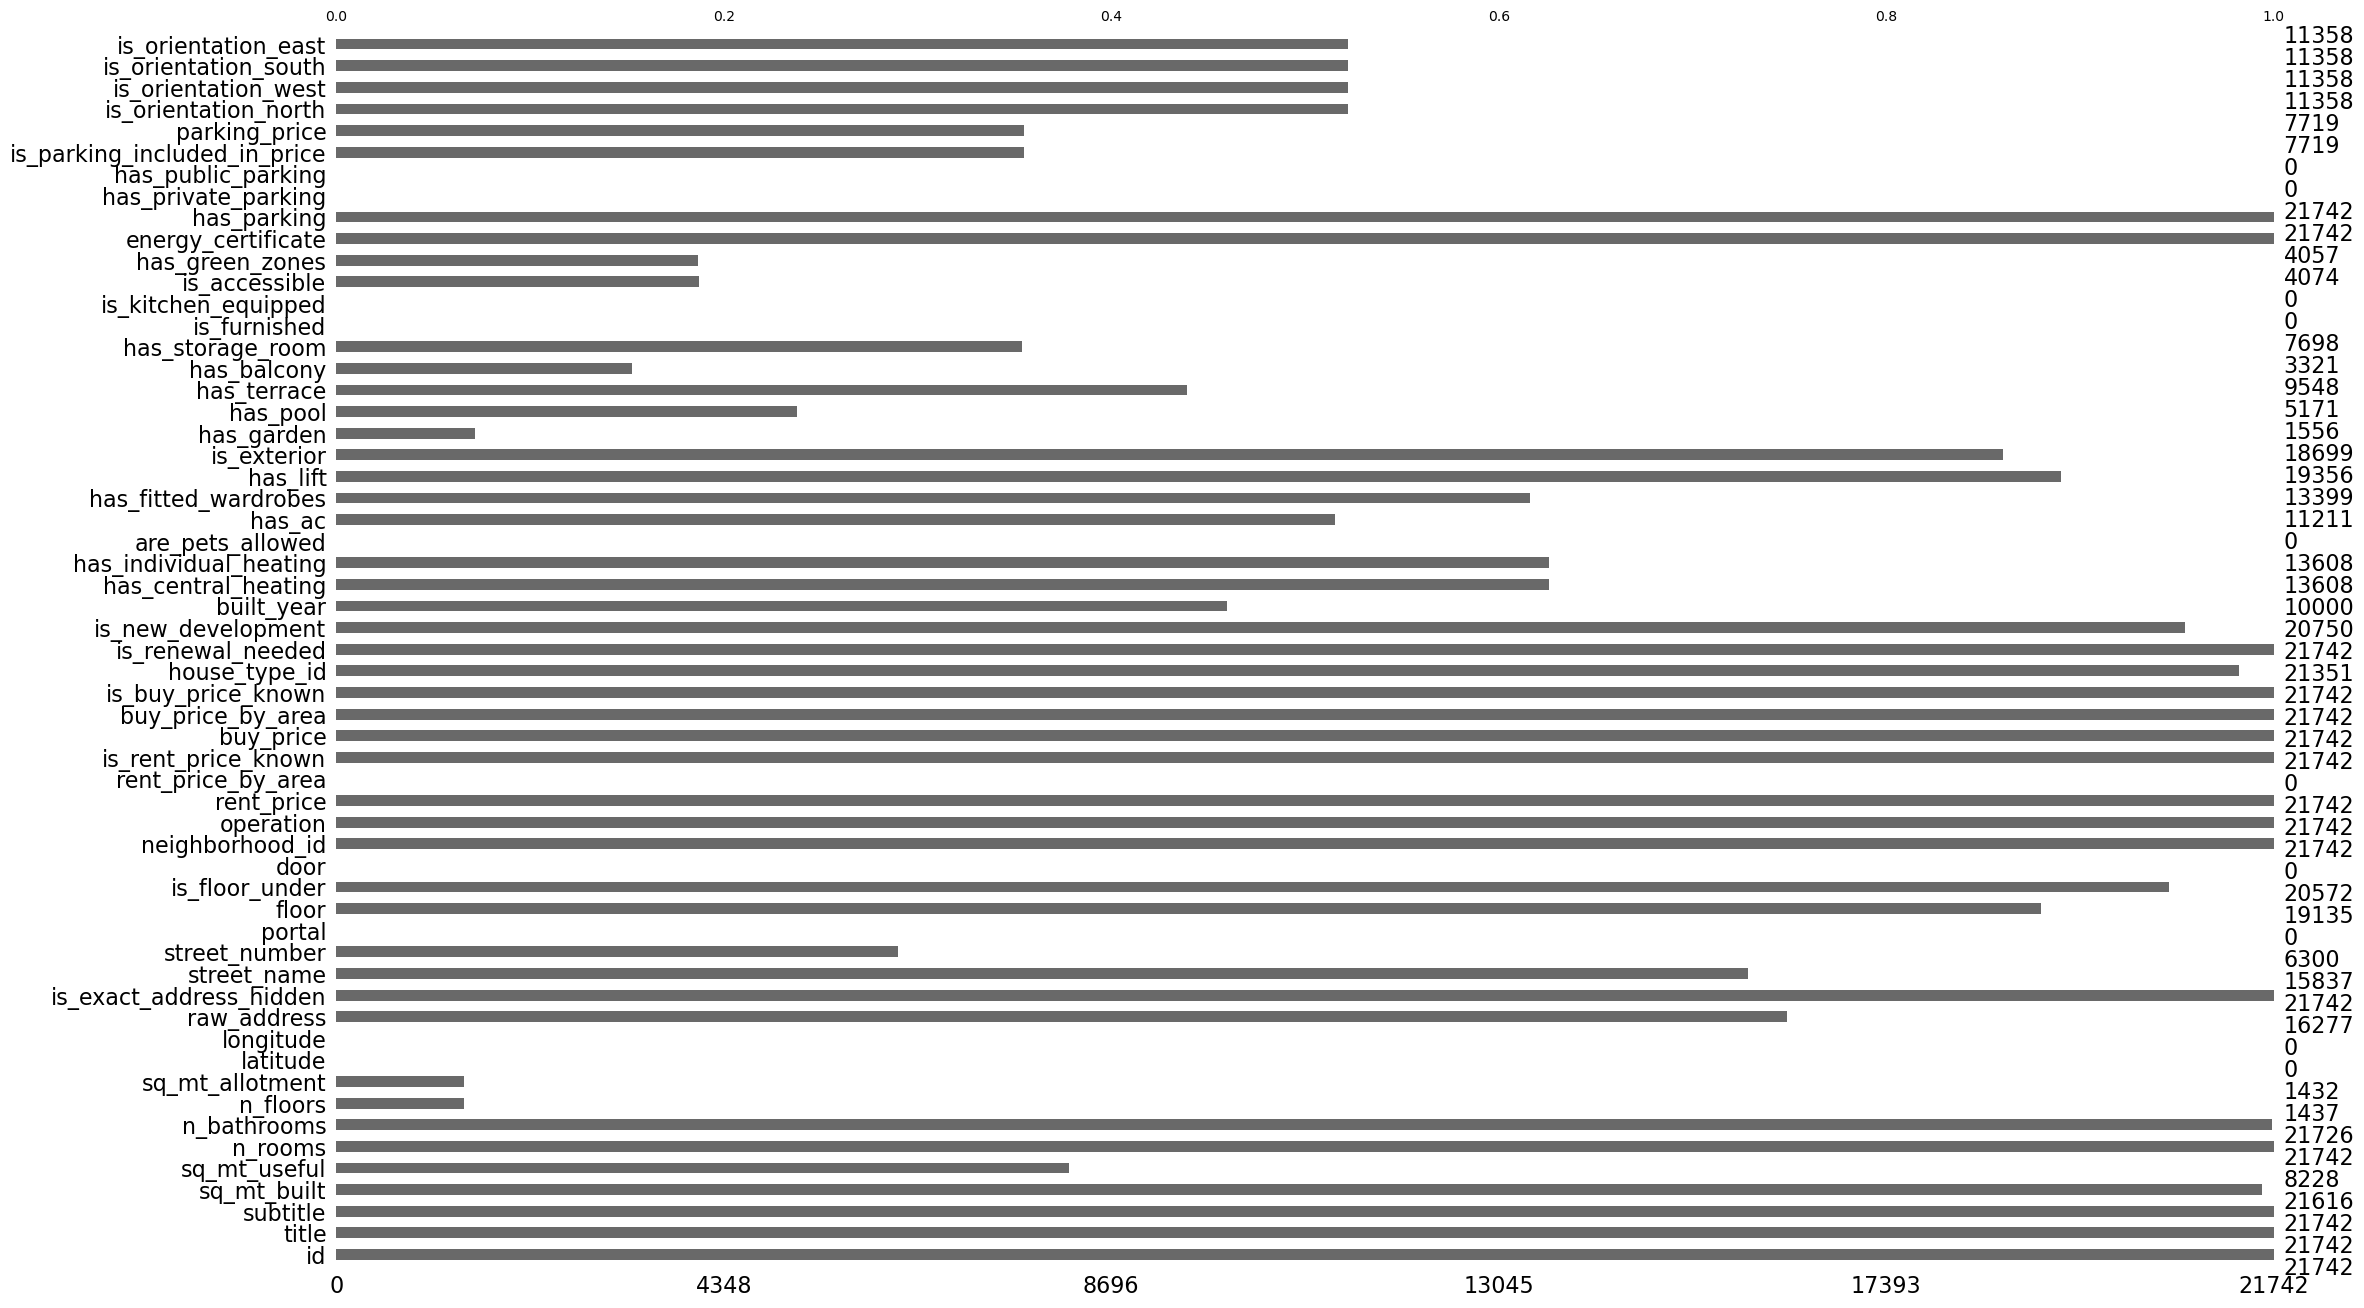

In [6]:
msno.bar(df)

## Variables quantitatives traitées par Saganne

In [7]:
#drop des colonnes vides:
df = df.dropna(axis=1, how='all')

<Axes: >

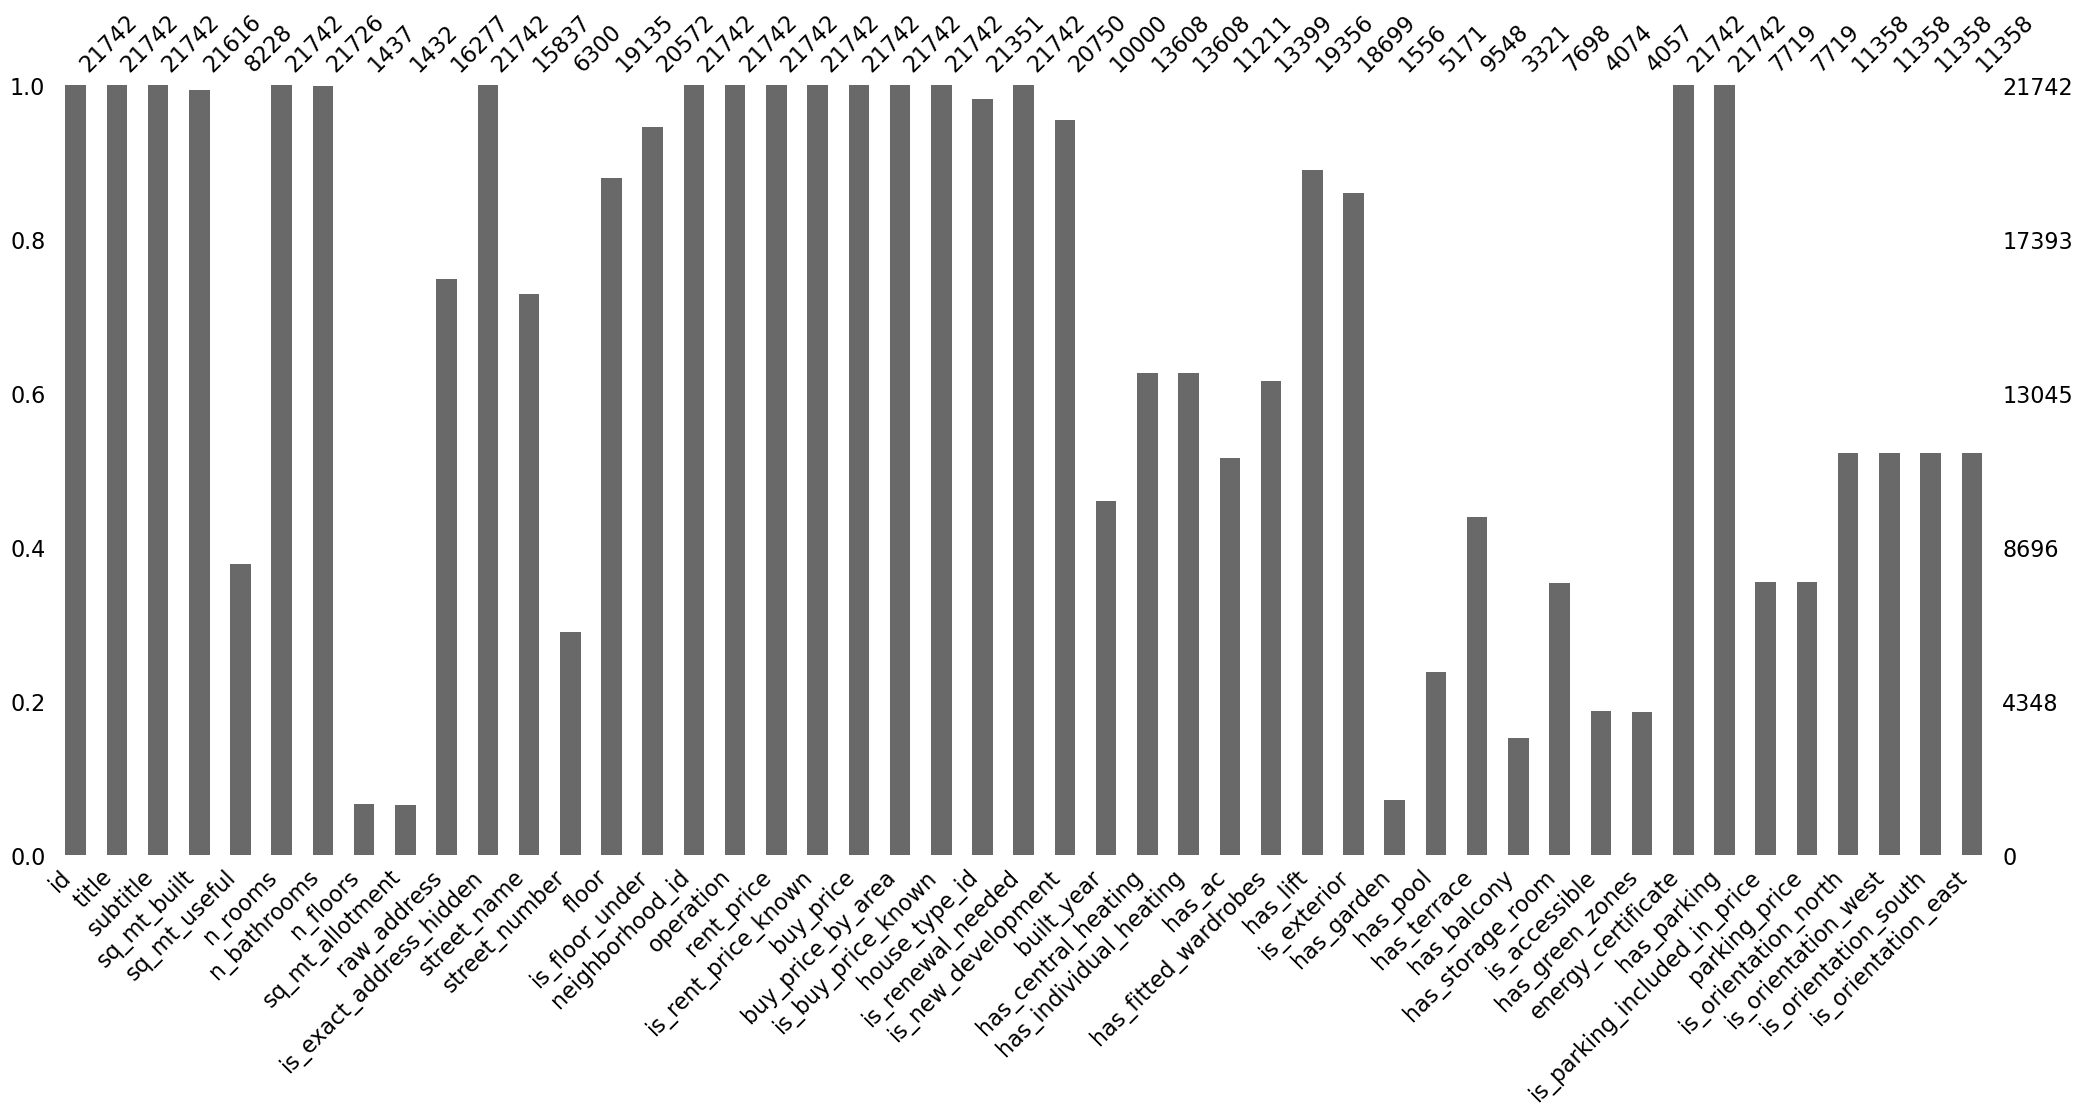

In [8]:
msno.bar(df)

In [9]:
df.describe()

,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,rent_price,buy_price,buy_price_by_area,built_year,parking_price
count,21742.000000,21616.000000,8228.000000,21742.000000,21726.000000,1437.000000,1432.000000,2.174200e+04,2.174200e+04,21742.000000,10000.000000,7719.000000
mean,10871.500000,146.920892,103.458192,3.005749,2.091687,3.128740,241.692737,-5.917031e+04,6.537356e+05,4020.523871,1970.046400,2658.000518
std,6276.519112,134.181865,88.259192,1.510497,1.406992,0.907713,247.484853,9.171162e+05,7.820821e+05,1908.418774,69.386705,13360.966258
min,1.000000,13.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-3.459028e+07,3.600000e+04,447.000000,1723.000000,0.000000
25%,5436.250000,70.000000,59.000000,2.000000,1.000000,2.000000,2.000000,7.250000e+02,1.980000e+05,2551.000000,1957.000000,0.000000
50%,10871.500000,100.000000,79.000000,3.000000,2.000000,3.000000,232.000000,1.116000e+03,3.750000e+05,3720.000000,1970.000000,0.000000
75%,16306.750000,162.000000,113.000000,4.000000,2.000000,4.000000,354.000000,1.687000e+03,7.636000e+05,5000.000000,1994.000000,0.000000
max,21742.000000,999.000000,998.000000,24.000000,16.000000,7.000000,997.000000,2.517000e+03,8.800000e+06,18889.000000,8170.000000,600000.000000


In [10]:
def iqr(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = col[(col < lower_bound) | (col > upper_bound)]
    return outliers.count()

outliers_sum = {}

# Appliquer la fonction à chaque colonne et stocker les sommes des outliers
for column in df.select_dtypes('number').columns:
    outliers_sum[column] = iqr(df[column])

# Afficher les sommes des outliers par colonne
for column, sum_value in outliers_sum.items():
    print(f"La colonne {column} a une somme d'outliers de : {sum_value}")


La colonne id a une somme d'outliers de : 0
La colonne sq_mt_built a une somme d'outliers de : 2228
La colonne sq_mt_useful a une somme d'outliers de : 740
La colonne n_rooms a une somme d'outliers de : 225
La colonne n_bathrooms a une somme d'outliers de : 2805
La colonne n_floors a une somme d'outliers de : 0
La colonne sq_mt_allotment a une somme d'outliers de : 35
La colonne rent_price a une somme d'outliers de : 2526
La colonne buy_price a une somme d'outliers de : 1957
La colonne buy_price_by_area a une somme d'outliers de : 564
La colonne built_year a une somme d'outliers de : 627
La colonne parking_price a une somme d'outliers de : 602


## Valeurs manquantes des variables qualitatives

In [11]:
df.select_dtypes('object').isna().sum()

title                               0
subtitle                            0
raw_address                      5465
street_name                      5905
street_number                   15442
floor                            2607
is_floor_under                   1170
neighborhood_id                     0
operation                           0
house_type_id                     391
is_new_development                992
has_central_heating              8134
has_individual_heating           8134
has_ac                          10531
has_fitted_wardrobes             8343
has_lift                         2386
is_exterior                      3043
has_garden                      20186
has_pool                        16571
has_terrace                     12194
has_balcony                     18421
has_storage_room                14044
is_accessible                   17668
has_green_zones                 17685
energy_certificate                  0
is_parking_included_in_price    14023
is_orientati

In [12]:
for col in df.select_dtypes('object'):
    print("nbr_nan:",df[col].isna().sum())
    print("valeurs uniques :",df[col].nunique())
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print("_ _ _ _ _ _ _ _ _ _") 
    print("_ _ _ _ _ _ _ _ _ _") 

nbr_nan: 0
valeurs uniques : 10736
['Piso en venta en calle de Godella, 64'
 'Piso en venta en calle de la del Manojo de Rosas'
 'Piso en venta en calle del Talco, 68'
 'Piso en venta en calle Pedro Jiménez'
 'Piso en venta en carretera de Villaverde a Vallecas']
10736
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
nbr_nan: 0
valeurs uniques : 146
['San Cristóbal, Madrid' 'Los Ángeles, Madrid' 'San Andrés, Madrid'
 'Los Rosales, Madrid' 'Villaverde, Madrid']
146
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
nbr_nan: 5465
valeurs uniques : 9666
['Calle de Godella, 64' 'Calle de la del Manojo de Rosas'
 'Calle del Talco, 68' 'Calle Pedro Jiménez'
 'Carretera de Villaverde a Vallecas']
9666
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
nbr_nan: 5905
valeurs uniques : 6177
['Calle de Godella' 'Calle de la del Manojo de Rosas' 'Calle del Talco'
 'Calle Pedro Jiménez' 'Carretera de Villaverde a Vallecas']
6177
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
nbr_nan: 15442
valeurs uniques : 420
['64' nan '68' '67' '63'

Une premire observation du contenu des colonnes de types object me permet de faire une première sélection des colonnes à supprimer.  
* title
* subtitle
* raw_address
* street name
* street number
* is_floor_under
* operation
* is_new_development
* has_central_heating
* has_individual_heating
* is_new_development
* has_central_heating
* has_ac
* has_fitted_wardrobes
* has_lift
* is_exterior
* has_garden
* has_pool
* is_accessible
* has_green_zones
* is_parking_included_in_price
* energy_certificate
* is_orientation_north
* is_orientation_west
* is_orientation_east
* is_orientation_south
* is_exact_address_hidden	
* is_rent_price_known	
* is_buy_price_known

In [13]:
col_to_drop = ['title','subtitle','raw_address','street_name','street_number','is_floor_under','operation',
              'is_new_development','has_central_heating','has_individual_heating','is_new_development',
              'has_central_heating','has_ac','has_fitted_wardrobes','has_lift',
    'is_exterior', 'has_garden', 'has_pool','is_exact_address_hidden','is_rent_price_known','is_buy_price_known',
        'is_accessible', 'has_green_zones', 'is_parking_included_in_price',
               'energy_certificate','is_orientation_north', 'is_orientation_west','is_orientation_east','is_orientation_south']


In [14]:
df = df.drop(col_to_drop,axis=1)

In [15]:
df['neighborhood_id'][0]

'Neighborhood 135: San Cristóbal (1308.89 €/m2) - District 21: Villaverde'

In [16]:
df['neighborhood_id']

0        Neighborhood 135: San Cristóbal (1308.89 €/m2)...
1        Neighborhood 132: Los Ángeles (1796.68 €/m2) -...
2        Neighborhood 134: San Andrés (1617.18 €/m2) - ...
3        Neighborhood 134: San Andrés (1617.18 €/m2) - ...
4        Neighborhood 133: Los Rosales (1827.79 €/m2) -...
                               ...                        
21737    Neighborhood 10: Casco Histórico de Barajas (3...
21738    Neighborhood 9: Campo de las Naciones-Corralej...
21739    Neighborhood 9: Campo de las Naciones-Corralej...
21740    Neighborhood 9: Campo de las Naciones-Corralej...
21741    Neighborhood 3: Imperial (4098.59 €/m2) - Dist...
Name: neighborhood_id, Length: 21742, dtype: object

In [17]:
pattern = r'Neighborhood (\d+): ([\w\s]+) \(([\d\.]+) €/m2\) - District (\d+): ([\w\s]+)'
df[['Neighborhood number', 'nom du quartier', 'euro/m2', 'district number', 'district']] = df['neighborhood_id'].str.extract(pattern)

In [23]:
df =df.drop('neighborhood_id',axis=1)

In [24]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Index: 21742 entries, 0 to 21741
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   floor                19135 non-null  object
 1   house_type_id        21351 non-null  object
 2   has_terrace          9548 non-null   object
 3   has_balcony          3321 non-null   object
 4   has_storage_room     7698 non-null   object
 5   Neighborhood number  17707 non-null  object
 6   nom du quartier      17707 non-null  object
 7   euro/m2              17707 non-null  object
 8   district number      17707 non-null  object
 9   district             17707 non-null  object
dtypes: object(10)
memory usage: 2.3+ MB


In [27]:
for col in df.select_dtypes('object'):
    print(df[col].value_counts())
    print('Valeurs manquantes : ',df[col].isna().sum())
    print('*'*20)
    

floor
1                       4440
2                       3546
3                       3001
4                       2323
Bajo                    2144
5                       1310
6                        913
7                        556
8                        326
Entreplanta exterior     236
9                        181
Semi-sótano exterior      55
Semi-sótano interior      36
Entreplanta interior      32
Sótano interior           23
Sótano                     5
Sótano exterior            4
Entreplanta                3
Semi-sótano                1
Name: count, dtype: int64
Valeurs manquantes :  2607
********************
house_type_id
HouseType 1: Pisos            17705
HouseType 2: Casa o chalet     1938
HouseType 5: Áticos            1032
HouseType 4: Dúplex             676
Name: count, dtype: int64
Valeurs manquantes :  391
********************
has_terrace
True    9548
Name: count, dtype: int64
Valeurs manquantes :  12194
********************
has_balcony
True    3321
Name: count, 

In [28]:
col_liste = ['has_terrace','has_balcony','has_storage_room']
for col in df[col_liste]:
    df[col] = df[col].fillna('False')
    

In [29]:
for col in df.select_dtypes('object'):
    print(df[col].value_counts())
    print('Valeurs manquantes : ',df[col].isna().sum())
    print('*'*20)
        
    

floor
1                       4440
2                       3546
3                       3001
4                       2323
Bajo                    2144
5                       1310
6                        913
7                        556
8                        326
Entreplanta exterior     236
9                        181
Semi-sótano exterior      55
Semi-sótano interior      36
Entreplanta interior      32
Sótano interior           23
Sótano                     5
Sótano exterior            4
Entreplanta                3
Semi-sótano                1
Name: count, dtype: int64
Valeurs manquantes :  2607
********************
house_type_id
HouseType 1: Pisos            17705
HouseType 2: Casa o chalet     1938
HouseType 5: Áticos            1032
HouseType 4: Dúplex             676
Name: count, dtype: int64
Valeurs manquantes :  391
********************
has_terrace
False    12194
True      9548
Name: count, dtype: int64
Valeurs manquantes :  0
********************
has_balcony
False    1842

In [30]:
df.head()

,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,floor,rent_price,buy_price,...,has_terrace,has_balcony,has_storage_room,has_parking,parking_price,Neighborhood number,nom du quartier,euro/m2,district number,district
0,21742,64.0,60.0,2,1.0,NaN,NaN,3,471,85000,...,False,False,False,False,NaN,135,San Cristóbal,1308.89,21,Villaverde
1,21741,70.0,NaN,3,1.0,NaN,NaN,4,666,129900,...,True,False,False,False,NaN,132,Los Ángeles,1796.68,21,Villaverde
2,21740,94.0,54.0,2,2.0,NaN,NaN,1,722,144247,...,False,False,True,False,NaN,134,San Andrés,1617.18,21,Villaverde
3,21739,64.0,NaN,2,1.0,NaN,NaN,Bajo,583,109900,...,False,False,True,False,NaN,134,San Andrés,1617.18,21,Villaverde
4,21738,108.0,90.0,2,2.0,NaN,NaN,4,1094,260000,...,False,False,True,True,0.0,133,Los Rosales,1827.79,21,Villaverde


In [39]:
df['district number'].sort_values(ascending=True).unique()

array(['1', '10', '11', '12', '13', '14', '15', '17', '18', '19', '2',
       '20', '21', '3', '4', '5', '6', '7', '8', '9', nan], dtype=object)

In [41]:
df['district number'] = df['district number'].fillna('16')

In [ ]:
for col in df.select_dtypes('object'):
    if col
    print(df[col].value_counts())
    print('Valeurs manquantes : ',df[col].isna().sum())
    print('*'*20)